In [65]:
%matplotlib inline
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [66]:
results_file = 'Results_NLST.csv'

In [41]:
# Read results
AI_list = [] # AI results
ER_list = [] # Expert reader results
with open(results_file) as csv_pointer:
    csv_reader = csv.reader(csv_pointer, delimiter=',')
    for row in csv_reader:
        if row[0] == 'PID': #Skip header
            continue
        AI_list.append(float(row[1]))
        ER_list.append(float(row[2]))
AI_list = np.asarray(AI_list)
ER_list = np.asarray(ER_list)

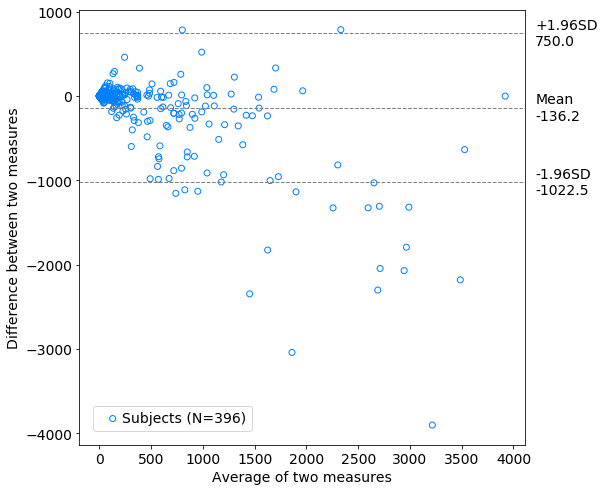

In [64]:
# Bland Altman plot

mean_list = np.mean([AI_list, ER_list], axis=0)
diff_list = AI_list - ER_list
md_list = np.mean(diff_list)
sd_list = np.std(diff_list, axis=0)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

plt.scatter(mean_list, diff_list, color='#0080FF', facecolors='none',
            label='Subjects (N=%d)' % len(AI_list))

plt.axhline(md, color='gray', linestyle='--', linewidth=1)
ax.annotate('Mean\n%0.1f'%md, xy=(np.max(mean_list), md), xytext=(30,0),
            textcoords='offset points', va='center', fontsize=14)
    
md_plus = md + 1.96 * sd
plt.axhline(md_plus, color='gray', linestyle='--', linewidth=1)
ax.annotate('+1.96SD\n%0.1f'%md_plus, xy=(np.max(mean_list), md_plus), xytext=(30,0),
            textcoords='offset points', va='center', fontsize=14)

md_minus = md - 1.96 * sd
plt.axhline(md_minus, color='gray', linestyle='--', linewidth=1)
ax.annotate('-1.96SD\n%0.1f'%md_minus, xy=(np.max(mean_list), md_minus), xytext=(30,0),
            textcoords='offset points', va='center', fontsize=14)

plt.xlabel('Average of two measures')
plt.ylabel('Difference between two measures')

plt.tick_params(axis='x', which='both', labelbottom=True, labelsize=14)
plt.tick_params(axis='y', which='both', labelleft=True, labelsize=14)

plt.xlabel('Average of two measures', fontsize=14)
plt.ylabel('Difference between two measures', fontsize=14)
plt.legend(loc="lower left", fontsize=14, edgecolor=None, handletextpad=-0.3, borderaxespad=1.0)

plt.show()
plt.close()

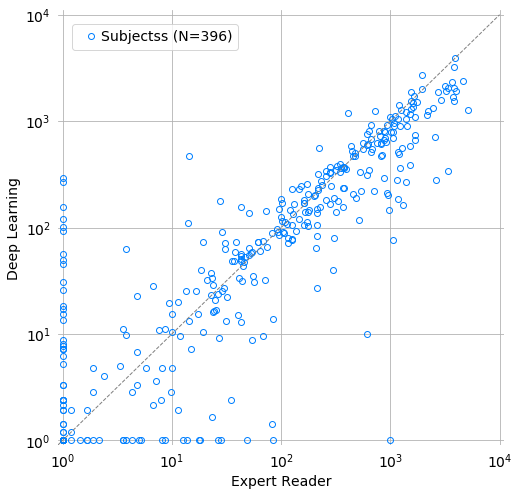

In [48]:
# Plot true against predicted
ER_list[ER_list < 1] = 1 # For log plot
AI_list[AI_list < 1] = 1 # For log plot

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(ER_list, AI_list, 'o', color='#0080FF', fillstyle='none',
        label='Subjectss (N=%d)' % len(ER_list))

ax.set_xscale('log')
ax.set_yscale('log')

ax.plot([-1, 10000], [-1, 10000], '--', color='gray', linewidth=1)
ax.set_xlim(0.9, 11000)
ax.set_ylim(0.9, 11000)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tick_params(axis='x', which='both', bottom=False, labelbottom=True, labelsize=14)
plt.tick_params(axis='y', which='both', left=False, labelleft=True, labelsize=14)

plt.grid()
plt.xlabel('Expert Reader', fontsize=14)
plt.ylabel('Deep Learning', fontsize=14)
plt.legend(loc="upper left", fontsize=14, edgecolor=None, handletextpad=-0.3, borderaxespad=1.0)

plt.show()
plt.close()